# 1. Mathematical functions
*Reference: [SciPy](https://docs.scipy.org/doc/numpy-1.17.0/reference/routines.math.html)*

In [1]:
import numpy as np

#### Trigonometry

In [ ]:
np.pi

In [ ]:
np.sin(np.pi/2)

In [ ]:
np.cos(0)

In [ ]:
np.tan(np.pi/4)

#### Rounding

In [ ]:
array = np.array([-4.3, 3.14, 5.64, -7.55])
np.floor(array)

In [ ]:
array = np.array([-4.3, 3.14, 5.64, -7.55])
np.ceil(array)

In [ ]:
np.round(np.pi)

In [ ]:
np.round(np.e, 2)

#### Exponents and logarithms

In [ ]:
np.e

In [ ]:
array = np.array([1, 2, 3])
np.exp(array)

In [ ]:
np.emath.sqrt(-1)

In [ ]:
np.log(np.e)

In [ ]:
array = np.array([10, 1000, 100000])
np.log10(array)

#### Other functions

In [ ]:
array = np.array([-4, 6, -7])
np.abs(array)

In [ ]:
array = np.arange(10)
np.cumsum(array)

In [ ]:
array = np.logspace(1, 4, 4)
np.diff(array)

#### Polynomial fitting
Find the coefficients for the polynomial $p(\mathbf{x})$ of degree $n$ that is the best fit for the data points $(\mathbf{x}_i, \mathbf{y}_i)$. Based on the least squares method.

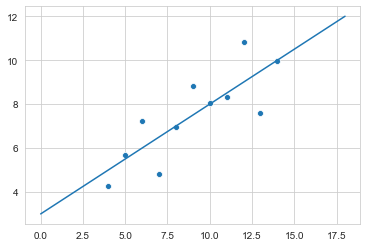

In [8]:
import seaborn as sns; sns.set_style('whitegrid')

degree = 1

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y = np.array([8.04, 6.950, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

coefs = np.polyfit(x, y, deg=degree)

x_fit = np.linspace(0, 18, 1000)
y_fit = sum(x_fit**(degree-i) * coefs[i] for i in range(degree+1))

_ = sns.scatterplot(x, y)
_ = sns.lineplot(x_fit, y_fit)

# 2. Linear Algebra
Convention:
- Regular, lowercase letters are used for scalars.
- Bold, lowercase letters are used for column vectors. For row vectors, add a transpose operator.
- Bold, uppercase letters are used for matrices.

For example:
$x=5$, $\alpha=8$, $\mathbf{x}=\begin{bmatrix}1\\2\\3\end{bmatrix}$,
$\mathbf{0}=\begin{bmatrix}0\\0\\0\end{bmatrix}$,
$\mathbf{A}=\begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}$

## 2.1. Special matrices

In [2]:
import numpy as np

#### Zero matrix
The matrix where every element is equal to 0.

In [3]:
np.zeros((3,4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### Matrix of ones

In [4]:
np.ones((4,6), dtype=int)

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

#### Square matrix
A matrix with the same number of rows and columns.

In [5]:
np.random.random((3,3))

array([[0.20639021, 0.6348458 , 0.41424616],
       [0.74047367, 0.67598526, 0.92274593],
       [0.43987545, 0.20554807, 0.38868093]])

In [6]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### Unit/Identity matrix
A square matrix with ones on the main diagonal and zeros elsewhere, denoted by $\mathbf{I}_n$ where $n$ is the length of each size.

In [7]:
np.eye(N=5, dtype=int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

#### Diagonal matrix
A square matrix in which the elements outside the main diagonal are all zero.

In [8]:
array = np.random.randint(10, size=(4,4))
np.diag(np.diag(array))

array([[9, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 7, 0],
       [0, 0, 0, 2]])

#### Triangular matrix
Two types of triangular matrix: lower and upper.

In [9]:
array = np.random.randint(10, size=(4,4))
np.tril(array)

array([[6, 0, 0, 0],
       [4, 1, 0, 0],
       [2, 7, 5, 0],
       [6, 5, 3, 0]])

In [10]:
array = np.random.randint(10, size=(4,4))
np.triu(array)

array([[2, 3, 3, 1],
       [0, 8, 2, 7],
       [0, 0, 0, 7],
       [0, 0, 0, 3]])

#### Sparse matrix
Sparse matrix is a large matrix that most of its elements are zero. Our approach is to compress the sparse matrix to storing the non-zero values only (compressed sparse row (CSR) matrix). This lead to significant computational saving.

For example, imagine a matrix where every column is a Netflix movie and each row is a Netflix user, the values are how many times an user has watched a particular movie. That matrix would have thousands of columns and milions of rows. However, since most users have not watched most movies, the vast majority of the matrix values would be zero.

In [ ]:
from scipy import sparse

In [ ]:
large_matrix = np.array(
    [[0, 0, 0, 0, 0, 4, 0, 0, 7, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [3, 0, 0, 0, 0, 0, 0, 0, 8, 0]]
)
large_matrix

In [ ]:
np.nonzero(large_matrix)

In [ ]:
compressed_matrix = sparse.csr_matrix(large_matrix)

In [ ]:
print(compressed_matrix)

## 2.2. Matrix operations

In [ ]:
import numpy as np

#### Addition
The matrices to be used in addition or subtraction must be of the same shape. The sum of $\mathbf{A}$ $(m \times n)$ and $\mathbf{B}$ $(m \times n)$ is calculated:

$$(\mathbf{A}+\mathbf{B})_{ij} = \mathbf{A}_{ij} + \mathbf{B}_{ij}$$

where $i \in \{1, 2, 3,\dots, m\}$ and $j \in \{1, 2, 3,\dots, n\}$

In [11]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

In [12]:
B = np.array([[7, 5, 8],
              [2, 0, 7]])

In [13]:
A + B

array([[ 8,  7, 11],
       [ 6,  5, 13]])

In [14]:
B - A

array([[ 6,  3,  5],
       [-2, -5,  1]])

Alternatively, you can use `numpy.add()`.

In [ ]:
np.add(A, B)

#### Scalar multiplication
For a scalar $c$ and a matrix $\mathbf{A}$ $(m\times n)$, the multiplication can be computed: $(c\mathbf{A})_{ij} = c\cdot \mathbf{A}_{ij}$

In [15]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

In [16]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

#### Matrix multiplication
The dot product of $\mathbf{A}$ $(m\times n)$ and $\mathbf{B}$ $(n\times p)$ is a matrix $\mathbf{C}$ $(m\times p)$ where the element of $\mathbf{C}$ in the row $x^{th}$ and column $y^{th}$ is calculated by the formula:
$$\mathbf{C}_{xy} = \sum_{i=1}^n {\mathbf{A}_{xi}\mathbf{B}_{iy}}$$

In [17]:
A = np.linspace(1, 6, 6, dtype=int).reshape(2, 3)
B = np.linspace(1, 12, 12, dtype=int).reshape(3, 4)

In [ ]:
A

In [ ]:
B

In [ ]:
np.dot(A, B)

In [ ]:
A @ B

#### Transposition
Transposition is a  operator where the matrix is flipped over its diagonal. The transpose of the matrix $\mathbf{A}$ ($m\times n$) is denoted $\mathbf{A}^T$ ($n\times m$) and satisfies $\mathbf{A}_{ij}$ = $(\mathbf{A}^T)_{ji}$ where $i\in \{1,2,3,\dots,m\}$ and $j \in \{1,2,3,\dots,n\}$.

In [18]:
A = np.arange(24).reshape(3,8)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [19]:
A.T

array([[ 0,  8, 16],
       [ 1,  9, 17],
       [ 2, 10, 18],
       [ 3, 11, 19],
       [ 4, 12, 20],
       [ 5, 13, 21],
       [ 6, 14, 22],
       [ 7, 15, 23]])

In [20]:
np.diag(A) == np.diag(A.T)

array([ True,  True,  True])

#### Properties
Here are some properties of matrix operations:
- $\mathbf{A}+\mathbf{B} = \mathbf{B}+\mathbf{A}$ (commutativity)
- $(c\mathbf{A})^T = c \cdot \mathbf{A}^T$
- $(\mathbf{A}+\mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$
- $(\mathbf{A}^T)^T = \mathbf{A}$
- $(\mathbf{A}\mathbf{B})\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C}) = \mathbf{A}\mathbf{B}\mathbf{C}$ (associativity)
- $(\mathbf{A}+\mathbf{B})\mathbf{C} = \mathbf{A}\mathbf{C} + \mathbf{B}\mathbf{C}$ (distributivity)
- $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$

## 2.3. Diagonal and trace

#### The diagonal
To get the main diagonal of the matrix, use the `numpy.diag()` function. The `k` parameter moves the diagonal up $k$ steps (if `k` is negative then the diagonal moves down).

In [ ]:
import numpy as np

In [21]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
np.diag(A)

array([ 0,  5, 10])

In [23]:
np.diag(A, k=1)

array([ 1,  6, 11])

#### The trace
The trace of a square matrix is the sum of the main diagonal elements. Despite that NumPy supports calculating the trace for any type of matrix, Mathematics define the trace for square matrices only.

In [24]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
A.trace()

15

In [26]:
np.diag(A).sum()

15

## 2.4. Echelon form and rank

In [ ]:
import numpy as np

#### Gaussian elimination
Gaussian elimination (also known as row reduction) is a linear algebra algorithm for solving a system of linear equations; finding the rank, the determinant and the inverse of matrices. There are three types of elementary matrix operations:
- Interchanging two rows
- Multiplying a row by a non-zero number
- Adding a multiple of a row to another row

#### Echelon form
Using Gaussian elimination, you can transform any matrix to the row echelon or column echelon form. However, only row echelon form is considered in this topic.

$$
\begin{bmatrix}
a & * & * & * & * & * & * & * & * \\
0 & 0 & b & * & * & * & * & * & * \\
0 & 0 & 0 & c & * & * & * & * & * \\
0 & 0 & 0 & 0 & 0 & 0 & d & * & * \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & e & * \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

A matrix is in echelon form when it satisfies the following conditions:
- All zero rows (rows with all zero elements) are at the bottom.
- Each pivot (or leading entry) - the leftmost non-zero element of each row is always to the right of the pivot of the rows above. In the example above, $a$, $b$, $c$, $d$ and $e$ are pivots.

To transform a matrix to echelon form, use the `scipy.linalg.lu()` function.

In [28]:
A = np.array(
    [[0, 1, 2],
     [1, 2, 1],
     [2, 7, 8]]
)
import scipy.linalg
_, _, echelon = scipy.linalg.lu(A)
echelon

array([[ 2. ,  7. ,  8. ],
       [ 0. , -1.5, -3. ],
       [ 0. ,  0. ,  0. ]])

In [ ]:
echelon.astype(int)

#### Rank
The rank of a matrix is the highest number of linear independent rows in the matrix. A vector linear dependent if it equals to the sum of scalar multiples of other vectors. The maximum rank of the matrix $\mathbf{A}$ $(m\times n)$ is $\min(m,n)$. $\mathbf{A}$ is said to be full rank if its rank reachs the maximum value and to be rank deficient otherwise.

To find the rank of a matrix, use the `numpy.linalg.matrix_rank()` function.

In [29]:
np.linalg.matrix_rank(A)

2

## 2.5. The determinant and the inverse
These attributes are defined only for square matrices.

In [ ]:
import numpy as np

#### Minors and cofactors
The minor and the cofactor are required to calculate the determinant and the inverse of square matrices. Given a square matrix $\mathbf{A}$ $(n\times n)$:
- The minor of $\mathbf{A}_{ij}$ is the determinant of the $(n-1)\cdot (n-1)$ submatrix formed by deleting the $i^{th}$ row and the $j^{th}$ column, denoted $M_{ij}$.
- The corresponding cofactor is $\mathbf{C}_{ij}=(-1)^{i+j}M_{ij}$.

From the calculated cofactors, we have the matrix of cofactors (adjugate matrix):

$$
\mathbf{C} =
\begin{bmatrix}
C_{11} & C_{12} & \dots  & C_{1n}\\
C_{21} & C_{22} & \dots  & C_{2n}\\
\vdots  & \vdots  & \ddots & \vdots \\
C_{n1} & C_{n2} & \dots  & C_{nn}
\end{bmatrix}
$$

#### Determinant
The determinant of a $2\times 2$ matrix is:
$
\begin{vmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{vmatrix}
= a_{11}a_{22} - a_{12}a_{21}.
$

To calculate the determinant of the matrix $\mathbf{A}$ $(n\times n)$ (denoted $|\mathbf{A}|$), use the Laplace formula (a recursion with the base case of $n=2$):

$$\det(\mathbf{A}) = |\mathbf{A}| = \sum_{i=1}^n a_{ij}(-1)^{i+j}M_{ij} = \sum_{i=1}^n a_{ij}C_{ij}$$
where: $i, j \in \{1,2,3,...,n\}$.

To calculate the determinant of a square matrix, use the `numpy.linalg.det()` function.

In [ ]:
import numpy as np

In [ ]:
np.random.seed(0)
A = np.random.randint(1, 10, (5,5))
A

In [ ]:
np.linalg.det(A)

#### Inverse
The inverse of the square matrix $\mathbf{A}$ $(n\times n)$ is denoted $\mathbf{A}^{-1}$ and satisfies $\mathbf{A} \cdot \mathbf{A}^{-1} = \mathbf{I}_n$ where $\mathbf{I}_n$ is the unit matrix. $\mathbf{A}$ is invertible only if $|\mathbf{A}| \ne 0$. The formula for inversion is:

$$\mathbf{A}^{-1} = \frac{1}{|\mathbf{A}|}C^T$$

To calcualate the inverse of a square matrix, use the `numpy.linalg.inv()` function.

In [22]:
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])
np.linalg.inv(A)

array([[-24.,  18.,   5.],
       [ 20., -15.,  -4.],
       [ -5.,   4.,   1.]])

Let's check if the dot product of $\mathbf{A}$ and $\mathbf{A}^{-1}$ is an identity matrix.

In [23]:
A @ np.linalg.inv(A).astype(int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## 2.6. Eigenvalues and eigenvectors

#### Calculating
Eigenvalues and eigenvectors are defined only for square matrices. Each eigenvalue $(\lambda)$ and a corresponding eigenvector $(\mathbf{x})$ of the square matrix $\mathbf{A}$ satisfies: $\mathbf{A}\mathbf{x} = \lambda \mathbf{x}$. To find eigenvalues and eigenvectors:
- Solve the equation: $|\mathbf{A} - \lambda \mathbf{I}| = \mathbf{0}$ (called the characteristic equation) for $\lambda$.
- For each value of $\lambda$ found, you can either solve the equation $(\mathbf{A}-\lambda)\mathbf{x}=\mathbf{0}$ or use Gaussian elimination to convert the augmented matrix $(\mathbf{A} - \lambda \mathbf{I}|0)$ to echelon form then solve it as a system of linear equations.  
Note that there are an infinite number of linear dependent eigenvectors associated with a single eigenvalue.

To find eigenvalues and eigenvectors of a matrix, use the `numpy.linalg.eig()` function.

In [ ]:
import numpy as np

In [30]:
A = np.array([[1, -1, 3],
              [1, 2, 6],
              [3, 8, 9]])
eigenvalues, eigenvectors = np.linalg.eig(A)

In [31]:
eigenvalues

array([13.78499146,  0.89368918, -2.67868064])

In [32]:
sum(eigenvalues)

11.999999999999995

In [ ]:
eigenvectors
# each column is an eigenvector

In [ ]:
eigenvectors[:, 0]

Now calculate the value of $\mathbf{A}\mathbf{x}$ and $\lambda \mathbf{x}$ and check if they are equal.

In [ ]:
A @ eigenvectors[:,0]

In [ ]:
eigenvalues[0] * eigenvectors[:,0]

#### Propreties
Here are some properties of eigenvalues, you can check them using NumPy:
- The sum of all eigenvalues is the same as the trace of $\mathbf{A}$.
- The product of all eigenvalues is the same as the determinant of $\mathbf{A}$.
- The number of eigenvalues equals to the rank of $\mathbf{A}$.
- $\mathbf{A}$ and $\mathbf{A}^T$ have the same set of eigenvalues.